In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
from sklearn.metrics import classification_report, auc, confusion_matrix, roc_auc_score, roc_curve
from matplotlib import cm,colors
from matplotlib.ticker import StrMethodFormatter
from matplotlib.lines import Line2D
import matplotlib as mpl

plt.style.use('../figures/journal-style.mplstyle')
plt.rcParams["axes.labelweight"] = "bold"

estimatedBEPrevalence = np.around(np.arange(0.0,0.56,0.01),2)
relativeChangesInQuality = np.around(np.arange(-0.25,0.26,0.01),2)

simulationResults = np.zeros((len(estimatedBEPrevalence),len(relativeChangesInQuality)))

In [2]:
triageData = pd.read_excel("../data/triageOutput/validationOutput.xlsx")
triageData.sort_values(by=['Triage class'],inplace=True,ascending=True)        
#triageDataNoConf = triageData.loc[(triageData['DL-QC-L']==0)]
#triageDataHighConfDiag = triageData.loc[(triageData['DL-QC-H']==1)]

In [3]:
triageDataPos = triageData.loc[triageData['Endoscopy (at least C1 or M3) + Biopsy (IM)']==1]
triageDataNeg = triageData.loc[triageData['Endoscopy (at least C1 or M3) + Biopsy (IM)']==0]
baseDataProps = [x/len(triageData) for x in triageData['Triage class'].value_counts(sort=False).tolist()]


cohortPrevalence = len(triageDataPos)/(len(triageDataNeg)+len(triageDataPos))
print(len(triageDataPos),len(triageDataNeg),len(triageDataPos)/(len(triageDataNeg)+len(triageDataPos)))


for prevIdx, bePrevalence in np.ndenumerate(estimatedBEPrevalence):
    for qualIdx, qualityChange in np.ndenumerate(relativeChangesInQuality):
        triageClassesPos = np.array([0,0,0,0,0,0,0,0])
        triageClassesPosKeys = triageDataPos['Triage class'].value_counts(sort=False).keys().tolist()
        triageClassesPosValues = triageDataPos['Triage class'].value_counts(sort=False).tolist()
        for k, i in zip(triageClassesPosKeys, triageClassesPosValues):
            triageClassesPos[k]=i 
        #print(triageClassesPos)
        #print(bePrevalence)
        triageClassesPos = [x/len(triageDataPos)*bePrevalence for x in triageClassesPos.tolist()]
        #print(triageClassesPos)
        
        triageClassesNeg = np.array([0,0,0,0,0,0,0,0])
        triageClassesNegKeys = triageDataNeg['Triage class'].value_counts(sort=False).keys().tolist()
        triageClassesNegValues = triageDataNeg['Triage class'].value_counts(sort=False).tolist()
        for k, i in zip(triageClassesNegKeys, triageClassesNegValues):
            triageClassesNeg[k]=i 
        #print(triageClassesNeg)    
        triageClassesNeg = [x /len(triageDataNeg)*(1-bePrevalence) for x in triageClassesNeg.tolist()]
        #print(triageClassesNeg)
        
        
        #print(triageClassesNeg)
        #print(updatedProps[0],updatedProps[1])
        updatedProps = [a + b for a, b in zip(triageClassesPos, triageClassesNeg)]

        #print((sum(updatedProps[0:3]+updatedProps[6:8]))/sum(updatedProps))

        newProps = np.asarray(updatedProps)
        lowQuality = newProps[[0,2,3,4,5,6]]
        highQuality = newProps[[1,7]]
        print('Quality '+str(qualityChange))
        print('Prev '+str(bePrevalence))
        newProps[[0,2,3,4,5,6]] *= (np.sum(lowQuality)+qualityChange)/np.sum(lowQuality)
        newProps[[1,7]] *= (np.sum(highQuality)-qualityChange)/np.sum(highQuality)
        newProps = newProps.tolist()
        print((sum(newProps[0:3]+newProps[6:8]))/sum(newProps))
        simulationResults[prevIdx,qualIdx] = (sum(newProps[0:3]+newProps[6:8]))/sum(newProps)
        #print(bePrevalence,updatedProps,simulationResults[prevIdx,qualIdx])
        #print(bePrevalence, prevIdx, qualityChange, qualIdx,simulationResults[prevIdx,qualIdx])

263 262 0.5009523809523809
Quality -0.25
Prev 0.0
0.7115072275458828
Quality -0.24
Prev 0.0
0.7053370147799253
Quality -0.23
Prev 0.0
0.6991668020139679
Quality -0.22
Prev 0.0
0.6929965892480104
Quality -0.21
Prev 0.0
0.6868263764820529
Quality -0.2
Prev 0.0
0.6806561637160956
Quality -0.19
Prev 0.0
0.6744859509501381
Quality -0.18
Prev 0.0
0.6683157381841807
Quality -0.17
Prev 0.0
0.6621455254182232
Quality -0.16
Prev 0.0
0.6559753126522657
Quality -0.15
Prev 0.0
0.6498050998863083
Quality -0.14
Prev 0.0
0.6436348871203509
Quality -0.13
Prev 0.0
0.6374646743543935
Quality -0.12
Prev 0.0
0.6312944615884359
Quality -0.11
Prev 0.0
0.6251242488224784
Quality -0.1
Prev 0.0
0.6189540360565211
Quality -0.09
Prev 0.0
0.6127838232905636
Quality -0.08
Prev 0.0
0.6066136105246062
Quality -0.07
Prev 0.0
0.6004433977586487
Quality -0.06
Prev 0.0
0.5942731849926913
Quality -0.05
Prev 0.0
0.5881029722267339
Quality -0.04
Prev 0.0
0.5819327594607764
Quality -0.03
Prev 0.0
0.575762546694819
Quality -0

Quality 0.0
Prev 0.04
0.5656842655211447
Quality 0.01
Prev 0.04
0.5595048905830893
Quality 0.02
Prev 0.04
0.5533255156450337
Quality 0.03
Prev 0.04
0.5471461407069784
Quality 0.04
Prev 0.04
0.540966765768923
Quality 0.05
Prev 0.04
0.5347873908308675
Quality 0.06
Prev 0.04
0.528608015892812
Quality 0.07
Prev 0.04
0.5224286409547567
Quality 0.08
Prev 0.04
0.5162492660167013
Quality 0.09
Prev 0.04
0.5100698910786458
Quality 0.1
Prev 0.04
0.5038905161405904
Quality 0.11
Prev 0.04
0.49771114120253496
Quality 0.12
Prev 0.04
0.49153176626447953
Quality 0.13
Prev 0.04
0.4853523913264241
Quality 0.14
Prev 0.04
0.4791730163883686
Quality 0.15
Prev 0.04
0.47299364145031325
Quality 0.16
Prev 0.04
0.4668142665122577
Quality 0.17
Prev 0.04
0.46063489157420223
Quality 0.18
Prev 0.04
0.45445551663614686
Quality 0.19
Prev 0.04
0.4482761416980914
Quality 0.2
Prev 0.04
0.442096766760036
Quality 0.21
Prev 0.04
0.4359173918219805
Quality 0.22
Prev 0.04
0.4297380168839251
Quality 0.23
Prev 0.04
0.4235586419

Quality -0.05
Prev 0.09
0.6071816191892278
Quality -0.04
Prev 0.09
0.6009902377366606
Quality -0.03
Prev 0.09
0.5947988562840937
Quality -0.02
Prev 0.09
0.5886074748315265
Quality -0.01
Prev 0.09
0.5824160933789596
Quality 0.0
Prev 0.09
0.5762247119263925
Quality 0.01
Prev 0.09
0.5700333304738254
Quality 0.02
Prev 0.09
0.5638419490212585
Quality 0.03
Prev 0.09
0.5576505675686914
Quality 0.04
Prev 0.09
0.5514591861161244
Quality 0.05
Prev 0.09
0.5452678046635573
Quality 0.06
Prev 0.09
0.5390764232109903
Quality 0.07
Prev 0.09
0.5328850417584233
Quality 0.08
Prev 0.09
0.5266936603058563
Quality 0.09
Prev 0.09
0.5205022788532893
Quality 0.1
Prev 0.09
0.5143108974007222
Quality 0.11
Prev 0.09
0.5081195159481551
Quality 0.12
Prev 0.09
0.5019281344955882
Quality 0.13
Prev 0.09
0.495736753043021
Quality 0.14
Prev 0.09
0.489545371590454
Quality 0.15
Prev 0.09
0.48335399013788705
Quality 0.16
Prev 0.09
0.47716260868531996
Quality 0.17
Prev 0.09
0.470971227232753
Quality 0.18
Prev 0.09
0.4647798

Quality -0.2
Prev 0.14
0.7108461755791802
Quality -0.19
Prev 0.14
0.7046421247168033
Quality -0.18
Prev 0.14
0.6984380738544262
Quality -0.17
Prev 0.14
0.6922340229920493
Quality -0.16
Prev 0.14
0.6860299721296724
Quality -0.15
Prev 0.14
0.6798259212672952
Quality -0.14
Prev 0.14
0.6736218704049184
Quality -0.13
Prev 0.14
0.6674178195425413
Quality -0.12
Prev 0.14
0.6612137686801643
Quality -0.11
Prev 0.14
0.6550097178177872
Quality -0.1
Prev 0.14
0.6488056669554102
Quality -0.09
Prev 0.14
0.6426016160930333
Quality -0.08
Prev 0.14
0.6363975652306564
Quality -0.07
Prev 0.14
0.6301935143682793
Quality -0.06
Prev 0.14
0.6239894635059023
Quality -0.05
Prev 0.14
0.6177854126435253
Quality -0.04
Prev 0.14
0.6115813617811483
Quality -0.03
Prev 0.14
0.6053773109187713
Quality -0.02
Prev 0.14
0.5991732600563944
Quality -0.01
Prev 0.14
0.5929692091940173
Quality 0.0
Prev 0.14
0.5867651583316402
Quality 0.01
Prev 0.14
0.5805611074692633
Quality 0.02
Prev 0.14
0.5743570566068862
Quality 0.03
Prev

Quality 0.14
Prev 0.18
0.5081916958545658
Quality 0.15
Prev 0.18
0.5019769944544749
Quality 0.16
Prev 0.18
0.49576229305438396
Quality 0.17
Prev 0.18
0.48954759165429296
Quality 0.18
Prev 0.18
0.4833328902542021
Quality 0.19
Prev 0.18
0.47711818885411117
Quality 0.2
Prev 0.18
0.4709034874540203
Quality 0.21
Prev 0.18
0.4646887860539295
Quality 0.22
Prev 0.18
0.4584740846538385
Quality 0.23
Prev 0.18
0.45225938325374765
Quality 0.24
Prev 0.18
0.44604468185365675
Quality 0.25
Prev 0.18
0.4398299804535658
Quality -0.25
Prev 0.19
0.752741595361902
Quality -0.24
Prev 0.19
0.7465241557369013
Quality -0.23
Prev 0.19
0.7403067161119008
Quality -0.22
Prev 0.19
0.7340892764869003
Quality -0.21
Prev 0.19
0.7278718368618997
Quality -0.2
Prev 0.19
0.7216543972368992
Quality -0.19
Prev 0.19
0.7154369576118986
Quality -0.18
Prev 0.19
0.7092195179868981
Quality -0.17
Prev 0.19
0.7030020783618975
Quality -0.16
Prev 0.19
0.696784638736897
Quality -0.15
Prev 0.19
0.6905671991118965
Quality -0.14
Prev 0.1

Quality 0.18
Prev 0.23
0.49362116932260236
Quality 0.19
Prev 0.23
0.48739245862601993
Quality 0.2
Prev 0.23
0.4811637479294375
Quality 0.21
Prev 0.23
0.4749350372328551
Quality 0.22
Prev 0.23
0.4687063265362727
Quality 0.23
Prev 0.23
0.46247761583969027
Quality 0.24
Prev 0.23
0.45624890514310784
Quality 0.25
Prev 0.23
0.4500201944465253
Quality -0.25
Prev 0.24
0.7636363210533952
Quality -0.24
Prev 0.24
0.757404710256945
Quality -0.23
Prev 0.24
0.7511730994604945
Quality -0.22
Prev 0.24
0.744941488664044
Quality -0.21
Prev 0.24
0.7387098778675936
Quality -0.2
Prev 0.24
0.7324782670711432
Quality -0.19
Prev 0.24
0.7262466562746929
Quality -0.18
Prev 0.24
0.7200150454782425
Quality -0.17
Prev 0.24
0.7137834346817922
Quality -0.16
Prev 0.24
0.7075518238853418
Quality -0.15
Prev 0.24
0.7013202130888915
Quality -0.14
Prev 0.24
0.6950886022924411
Quality -0.13
Prev 0.24
0.6888569914959906
Quality -0.12
Prev 0.24
0.6826253806995402
Quality -0.11
Prev 0.24
0.6763937699030899
Quality -0.1
Prev 0

Quality -0.03
Prev 0.29
0.6371264026201467
Quality -0.02
Prev 0.29
0.6308797675958921
Quality -0.01
Prev 0.29
0.6246331325716379
Quality 0.0
Prev 0.29
0.6183864975473834
Quality 0.01
Prev 0.29
0.612139862523129
Quality 0.02
Prev 0.29
0.6058932274988744
Quality 0.03
Prev 0.29
0.5996465924746202
Quality 0.04
Prev 0.29
0.5933999574503657
Quality 0.05
Prev 0.29
0.5871533224261113
Quality 0.06
Prev 0.29
0.5809066874018568
Quality 0.07
Prev 0.29
0.5746600523776024
Quality 0.08
Prev 0.29
0.568413417353348
Quality 0.09
Prev 0.29
0.5621667823290936
Quality 0.1
Prev 0.29
0.5559201473048391
Quality 0.11
Prev 0.29
0.5496735122805847
Quality 0.12
Prev 0.29
0.5434268772563303
Quality 0.13
Prev 0.29
0.5371802422320758
Quality 0.14
Prev 0.29
0.5309336072078213
Quality 0.15
Prev 0.29
0.524686972183567
Quality 0.16
Prev 0.29
0.5184403371593126
Quality 0.17
Prev 0.29
0.5121937021350581
Quality 0.18
Prev 0.29
0.5059470671108035
Quality 0.19
Prev 0.29
0.4997004320865492
Quality 0.2
Prev 0.29
0.493453797062

Quality -0.23
Prev 0.34
0.7729665536360869
Quality -0.22
Prev 0.34
0.7667039619107192
Quality -0.21
Prev 0.34
0.7604413701853514
Quality -0.2
Prev 0.34
0.7541787784599839
Quality -0.19
Prev 0.34
0.7479161867346161
Quality -0.18
Prev 0.34
0.7416535950092485
Quality -0.17
Prev 0.34
0.7353910032838809
Quality -0.16
Prev 0.34
0.7291284115585134
Quality -0.15
Prev 0.34
0.7228658198331457
Quality -0.14
Prev 0.34
0.716603228107778
Quality -0.13
Prev 0.34
0.7103406363824103
Quality -0.12
Prev 0.34
0.7040780446570428
Quality -0.11
Prev 0.34
0.6978154529316752
Quality -0.1
Prev 0.34
0.6915528612063075
Quality -0.09
Prev 0.34
0.6852902694809399
Quality -0.08
Prev 0.34
0.6790276777555722
Quality -0.07
Prev 0.34
0.6727650860302046
Quality -0.06
Prev 0.34
0.6665024943048369
Quality -0.05
Prev 0.34
0.6602399025794693
Quality -0.04
Prev 0.34
0.6539773108541017
Quality -0.03
Prev 0.34
0.6477147191287341
Quality -0.02
Prev 0.34
0.6414521274033665
Quality -0.01
Prev 0.34
0.6351895356779989
Quality 0.0
Pr

Quality -0.16
Prev 0.38
0.7377767136972619
Quality -0.15
Prev 0.38
0.7315006254084848
Quality -0.14
Prev 0.38
0.7252245371197078
Quality -0.13
Prev 0.38
0.7189484488309308
Quality -0.12
Prev 0.38
0.7126723605421537
Quality -0.11
Prev 0.38
0.7063962722533768
Quality -0.1
Prev 0.38
0.7001201839645997
Quality -0.09
Prev 0.38
0.6938440956758226
Quality -0.08
Prev 0.38
0.6875680073870457
Quality -0.07
Prev 0.38
0.6812919190982686
Quality -0.06
Prev 0.38
0.6750158308094916
Quality -0.05
Prev 0.38
0.6687397425207146
Quality -0.04
Prev 0.38
0.6624636542319374
Quality -0.03
Prev 0.38
0.6561875659431604
Quality -0.02
Prev 0.38
0.6499114776543834
Quality -0.01
Prev 0.38
0.6436353893656064
Quality 0.0
Prev 0.38
0.6373593010768293
Quality 0.01
Prev 0.38
0.6310832127880522
Quality 0.02
Prev 0.38
0.6248071244992752
Quality 0.03
Prev 0.38
0.6185310362104981
Quality 0.04
Prev 0.38
0.6122549479217213
Quality 0.05
Prev 0.38
0.6059788596329441
Quality 0.06
Prev 0.38
0.599702771344167
Quality 0.07
Prev 0.3

Quality -0.04
Prev 0.42
0.6709528181651523
Quality -0.03
Prev 0.42
0.6646625281741212
Quality -0.02
Prev 0.42
0.6583722381830899
Quality -0.01
Prev 0.42
0.6520819481920588
Quality 0.0
Prev 0.42
0.6457916582010275
Quality 0.01
Prev 0.42
0.6395013682099963
Quality 0.02
Prev 0.42
0.633211078218965
Quality 0.03
Prev 0.42
0.6269207882279338
Quality 0.04
Prev 0.42
0.6206304982369026
Quality 0.05
Prev 0.42
0.6143402082458715
Quality 0.06
Prev 0.42
0.6080499182548403
Quality 0.07
Prev 0.42
0.6017596282638091
Quality 0.08
Prev 0.42
0.5954693382727778
Quality 0.09
Prev 0.42
0.5891790482817466
Quality 0.1
Prev 0.42
0.5828887582907155
Quality 0.11
Prev 0.42
0.5765984682996842
Quality 0.12
Prev 0.42
0.570308178308653
Quality 0.13
Prev 0.42
0.5640178883176219
Quality 0.14
Prev 0.42
0.5577275983265907
Quality 0.15
Prev 0.42
0.5514373083355595
Quality 0.16
Prev 0.42
0.5451470183445282
Quality 0.17
Prev 0.42
0.538856728353497
Quality 0.18
Prev 0.42
0.5325664383624658
Quality 0.19
Prev 0.42
0.5262761483

Quality 0.09
Prev 0.46
0.5974767331480035
Quality 0.1
Prev 0.46
0.5911714795727566
Quality 0.11
Prev 0.46
0.5848662259975097
Quality 0.12
Prev 0.46
0.5785609724222627
Quality 0.13
Prev 0.46
0.572255718847016
Quality 0.14
Prev 0.46
0.565950465271769
Quality 0.15
Prev 0.46
0.5596452116965221
Quality 0.16
Prev 0.46
0.553339958121275
Quality 0.17
Prev 0.46
0.5470347045460282
Quality 0.18
Prev 0.46
0.5407294509707813
Quality 0.19
Prev 0.46
0.5344241973955345
Quality 0.2
Prev 0.46
0.5281189438202877
Quality 0.21
Prev 0.46
0.5218136902450407
Quality 0.22
Prev 0.46
0.5155084366697937
Quality 0.23
Prev 0.46
0.5092031830945469
Quality 0.24
Prev 0.46
0.5028979295192999
Quality 0.25
Prev 0.46
0.496592675944053
Quality -0.25
Prev 0.47
0.8140601233198751
Quality -0.24
Prev 0.47
0.807751002571331
Quality -0.23
Prev 0.47
0.8014418818227872
Quality -0.22
Prev 0.47
0.7951327610742431
Quality -0.21
Prev 0.47
0.7888236403256992
Quality -0.2
Prev 0.47
0.7825145195771551
Quality -0.19
Prev 0.47
0.7762053988

Quality 0.06
Prev 0.51
0.6268137051711618
Quality 0.07
Prev 0.51
0.6204885790779431
Quality 0.08
Prev 0.51
0.6141634529847245
Quality 0.09
Prev 0.51
0.6078383268915059
Quality 0.1
Prev 0.51
0.6015132007982872
Quality 0.11
Prev 0.51
0.5951880747050685
Quality 0.12
Prev 0.51
0.58886294861185
Quality 0.13
Prev 0.51
0.5825378225186313
Quality 0.14
Prev 0.51
0.5762126964254126
Quality 0.15
Prev 0.51
0.5698875703321941
Quality 0.16
Prev 0.51
0.5635624442389755
Quality 0.17
Prev 0.51
0.5572373181457569
Quality 0.18
Prev 0.51
0.5509121920525382
Quality 0.19
Prev 0.51
0.5445870659593195
Quality 0.2
Prev 0.51
0.5382619398661009
Quality 0.21
Prev 0.51
0.5319368137728824
Quality 0.22
Prev 0.51
0.5256116876796637
Quality 0.23
Prev 0.51
0.5192865615864452
Quality 0.24
Prev 0.51
0.5129614354932265
Quality 0.25
Prev 0.51
0.5066363094000078
Quality -0.25
Prev 0.52
0.8251042314279874
Quality -0.24
Prev 0.52
0.8187749642113288
Quality -0.23
Prev 0.52
0.8124456969946703
Quality -0.22
Prev 0.52
0.806116429

Quality -0.1
Prev 0.56
0.7387691784513768
Quality -0.09
Prev 0.56
0.7324227514198112
Quality -0.08
Prev 0.56
0.7260763243882458
Quality -0.07
Prev 0.56
0.7197298973566801
Quality -0.06
Prev 0.56
0.7133834703251146
Quality -0.05
Prev 0.56
0.707037043293549
Quality -0.04
Prev 0.56
0.7006906162619835
Quality -0.03
Prev 0.56
0.6943441892304179
Quality -0.02
Prev 0.56
0.6879977621988523
Quality -0.01
Prev 0.56
0.6816513351672867
Quality 0.0
Prev 0.56
0.6753049081357211
Quality 0.01
Prev 0.56
0.6689584811041556
Quality 0.02
Prev 0.56
0.6626120540725899
Quality 0.03
Prev 0.56
0.6562656270410244
Quality 0.04
Prev 0.56
0.6499192000094589
Quality 0.05
Prev 0.56
0.6435727729778933
Quality 0.06
Prev 0.56
0.6372263459463277
Quality 0.07
Prev 0.56
0.6308799189147622
Quality 0.08
Prev 0.56
0.6245334918831966
Quality 0.09
Prev 0.56
0.618187064851631
Quality 0.1
Prev 0.56
0.6118406378200654
Quality 0.11
Prev 0.56
0.6054942107885
Quality 0.12
Prev 0.56
0.5991477837569343
Quality 0.13
Prev 0.56
0.5928013

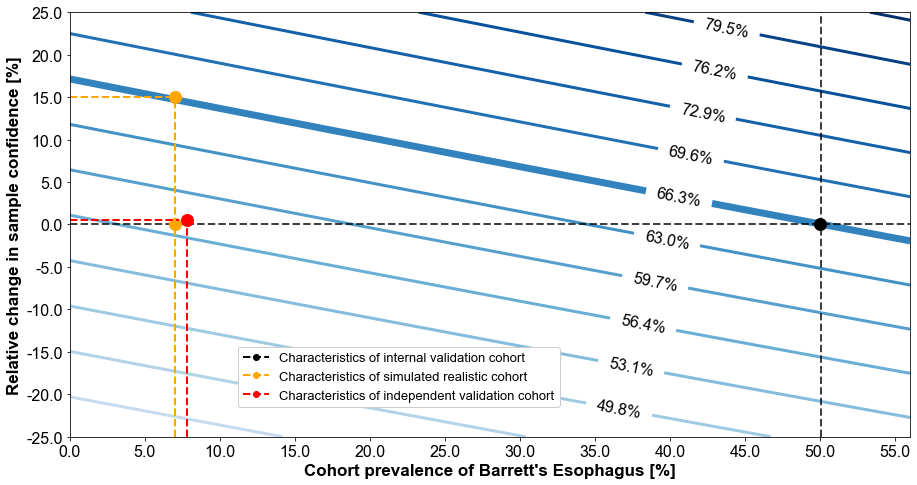

In [4]:
plt.figure(figsize=(13,7))
ax = plt.gca()
#plt.pcolormesh(np.flip(simulationResults.transpose(),0),cmap='YlGn')
cs = plt.contour(np.flip(simulationResults.transpose()*100,0),levels=np.arange(0.3,0.85,0.033)*100,linewidths=3,alpha=1,cmap='Blues')

fmt={}
manual_locations=[]
k=36
j=0
for l in cs.levels:
    fmt[l] = str(round(l,1))+'%'
    manual_locations.append((k,j))
    k+=0.8
    j+=5


#    
#print(len(manual_locations[::3]))
#print(len(cs.levels[::3]))
#
#manual_locations = [(0, 0), (1, 0), (20, 0), (30, 1), (40, 0), (45, 0)]
#plt.contourf(np.flip(simulationResults.transpose()*100,0),levels=np.arange(0.6,0.93,0.005)*100,alpha=0.55,cmap='Blues')
#plt.clabel(cs, cs.levels[::2], inline=1, fontsize=16,colors='black')
plt.clabel(cs, cs.levels[::1], inline=1, fontsize=16,fmt=fmt,manual=manual_locations[1:-6:1],colors='black')
#plt.xticks(np.arange(25),estimatedBEPrevalence[0::2])
ax.set_xticks(np.arange(0,56,5))
ax.set_xticklabels(np.around(estimatedBEPrevalence[0::5]*100,0))
ax.set_yticks(np.arange(0,51,5))
ax.set_yticklabels(relativeChangesInQuality[0::5]*100)
ax.set_xlabel('Cohort prevalence of Barrett\'s Esophagus [%]')
ax.set_ylabel('Relative change in sample confidence [%]')
plt.hlines(25,0,56,colors='k',linestyle='--',alpha=0.75)
plt.vlines(50.03,0,50,colors='k',linestyle='--',alpha=0.75)

plt.plot(7.0,40, marker='o', markersize=12, color="orange",linewidth=0,alpha=1)
plt.plot(7.0,25, marker='o', markersize=12, color="orange",linewidth=0,alpha=1)
plt.plot(7.83,25.5, marker='o', markersize=12, color="red",linewidth=0,alpha=1)
plt.plot(50.0,25, marker='o', markersize=12, color="k",linewidth=0,alpha=1)
#plt.axhline(y=66.26,xmin=0,xmax=0.91,linestyle='--',color='red',alpha=0.6)
plt.axhline(y=40,xmin=0,xmax=0.13,linestyle='--',color='orange',alpha=1)
#plt.axvline(x=50.0,ymin=0,ymax=0.78,linestyle='--',color='red',alpha=0.6)
plt.axvline(x=7.0,ymin=0,ymax=0.8,linestyle='--',color='orange',alpha=1)

plt.axhline(y=25.5,xmin=0,xmax=0.13,linestyle='--',color='red',alpha=1)
plt.axvline(x=7.83,ymin=0,ymax=0.5,linestyle='--',color='red',alpha=1)

cs.collections[11].set_linewidth(7)
#cs.collections[39].set_color('red')

black_patch = Line2D([0], [0], color='k', marker='o', linestyle='--', lw=2,label='Characteristics of internal validation cohort')
green_patch = Line2D([0], [0], color='orange', alpha=1, marker='o', linestyle='--', lw=2,label='Characteristics of simulated realistic cohort')
yellow_patch = Line2D([0], [0], color='red', alpha=1, marker='o', linestyle='--', lw=2,label='Characteristics of independent validation cohort')



#red_patch = mpatches.Patch(color=[0.365, 0.635, 0.812], label='Equal workload reduction line')




plt.legend(handles=[black_patch,green_patch,yellow_patch],loc='lower left', borderaxespad=0,facecolor='white',framealpha=1,bbox_to_anchor=(0.2, 0.07, 0.5, 0.5))

#cbar = plt.colorbar()
#cbar.set_label('Reduction in workload through manual review substitution [%]')
#cbar.set_ticks()
plt.tight_layout()
plt.savefig('../figures/simulationOfDiseasePrevSampleQuality-twoD.pdf')